# ***TASK 2***


In this task, you will make use of automated machine learning as well as traditional machine learning. The manager of the home loans department, who has provided us with sample data, wants to know a few things about the data. The questions about the data can be found in the notebook provided in the Resources section below.

**Part 1**




The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for?

**Part 2**

The conventional ML section and the AutoML section



We will use Python and its extensive collection of libraries to derive valuable insights from the data, prepare the data and train machine learning models - the old fashioned way and in newer, automated ways.

Importing Necessary Libraries

In [65]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for AutoEDA
!pip install sweetviz
import sweetviz

import warnings
warnings.filterwarnings('ignore')

Importing Datasets

In [66]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [67]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Concanitating two datasets

In [69]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


***1.An overview of the data***

In [70]:
train.shape[0]

614

In [71]:
len(train.columns)

13

In [72]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [73]:
test.shape[0]

367

In [74]:
len(test.columns)

12

In [75]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [77]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


***2.What data quality issues exist in both train and test? ***

In [78]:
df.duplicated().sum()

0

There are no duplicate values in test dataset.

In [79]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [80]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [81]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


***3.How do the the loan statuses compare?***



In [82]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

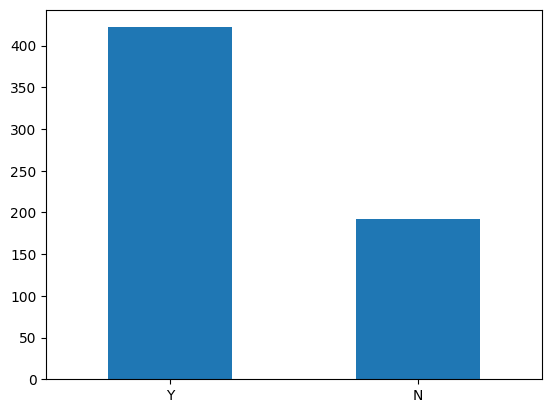

In [83]:
df['Loan_Status'].value_counts().plot.bar(rot=0)

***4.How do women and men compare when it comes to defaulting on loans in the historical dataset?***



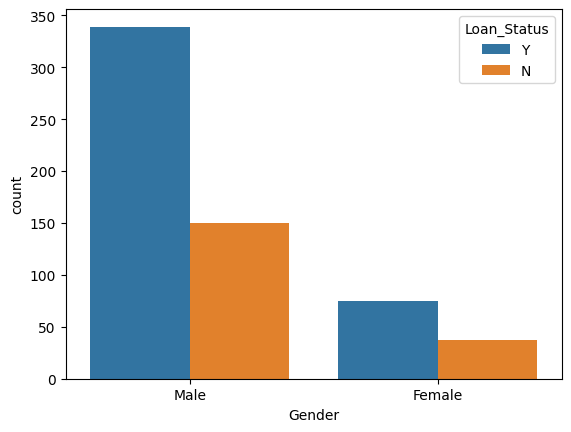

In [84]:
# Create the bar chart
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.legend(title='Loan_Status')

# Show the plot
import matplotlib.pyplot as plt
plt.show()

It seems men have more positive loan status than women.

***5.How many of the loan applicants have dependents based on the historical dataset?***



In [85]:
df['Dependents'].isnull().sum()

25

<Axes: >

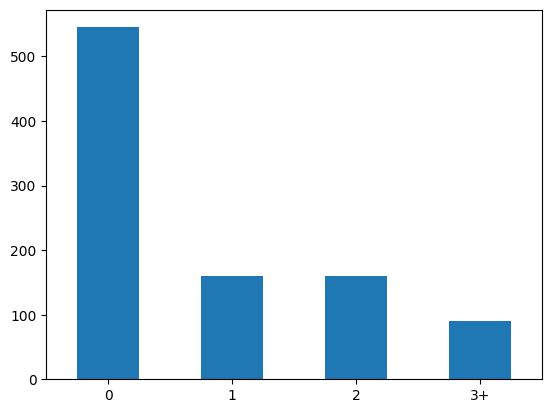

In [86]:
df['Dependents'].value_counts().plot.bar(rot=0)

It seems roughly 150 applicants have 1 dependent, another batch of 150 people have 2 dependents, and roughly 90 of the applicants have more than 3 dependents. Therefore, 390 applicants have dependents. We also need to consider that there are 25 missing values in the Dependents column.

***6.How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?***



<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

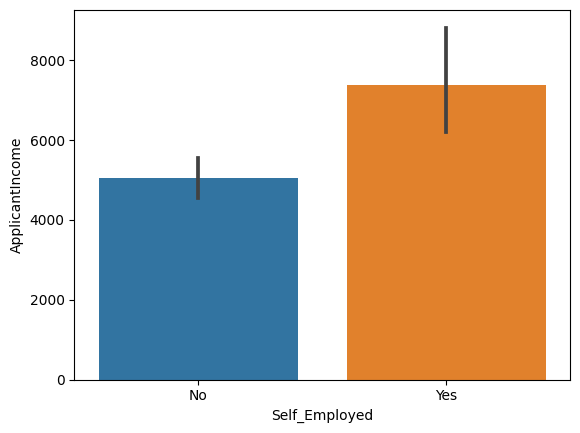

In [87]:
#Let's see a plot between the Self_employed column and the ApplicantIncome column

sns.barplot(x=train['Self_Employed'],y=train['ApplicantIncome'])

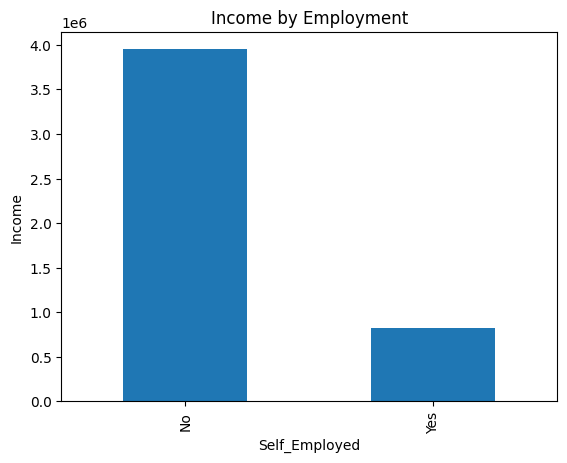

In [88]:
# Group by 'Self_Employed' and sum the income values
grouped = df.groupby('Self_Employed')['ApplicantIncome'].sum()

plt.xlabel('Self Employed')
plt.ylabel('Income')
plt.title('Income by Employment')

# Plot the grouped data
grouped.plot(kind='bar')
plt.show()

As we can see, using groupby menthod helped us to get an insight which shows that people who are not self employed have a significantly higher income.

***7.Are applicants with a credit history more likely to default than those who do not have one?***



In [89]:
# let's check for missing values
df['Credit_History'].isnull().sum()

79

In [90]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

it seems 1.0 and 0.0 are default credit history values

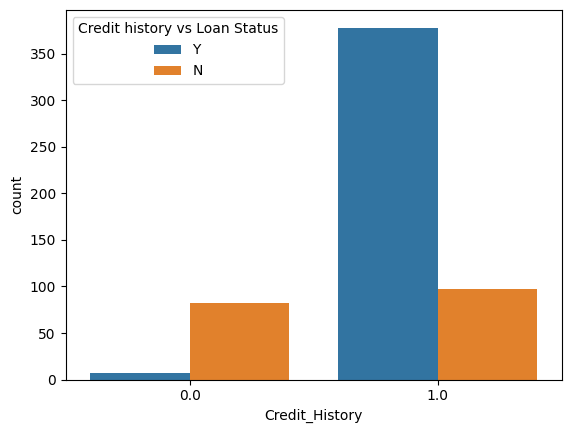

In [91]:
# Create the bar chart
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.legend(title='Credit history vs Loan Status')

# Show the plot
import matplotlib.pyplot as plt
plt.show()

It seems applicants who have a credit history of 1.0 have higher No loan status.

***8.Is there a correlation between the applicant's income and the loan amount they applied for?***

In [92]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

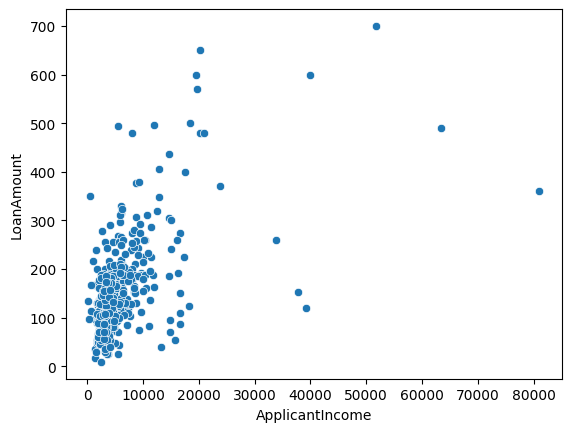

In [93]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=train)

<Axes: >

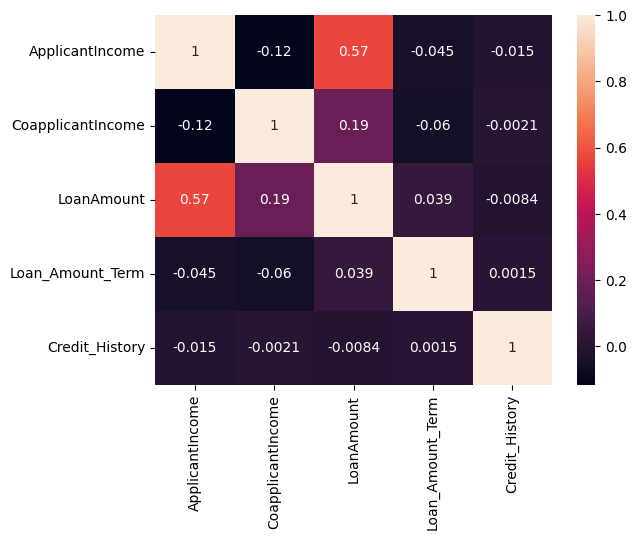

In [94]:
sns.heatmap(train.corr(),annot=True)

1.Overview of data:

There are 614 records and 13 fields in train dataset.
Out of which 8 fields are of object,4 float and 1 int datatypes.
There are 367 records ND 12 fields in test dataset.
Out of which 7 fields are of object,3 float and 2 int datatypes.
2.Data quality issues:

There are no duplicates in both train and test dataset.
There are missing Values for Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History fields in train dataset
There are missing Values for Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History fields in test dataset.
3.Out of 614 users, 422 users has loan status as Yes("accepted") and 192 users has loan status as No("rejected")

4.Mostly "Men" have defaulted on loans compared to women.

5.Out of 614 loan applicants, 254 applicants have dependents based on historical data.

6.The incomes of "employed" applicants are low when compared to "self-employed" applicants

7.Yes applicants with credit history are more likely to default than who don't have one.

8.Yes there is positive correlation between 'applicantsincome' and 'loanamount' with correlation value of 0.57

# *Part 2*
**Auto ML wth autosklearn**

In [95]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [96]:
!pip install sklearn

In [97]:
!pip install auto-sklearn

In [98]:
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [99]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [101]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [102]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(predictions_autoML, y_test)

In [103]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

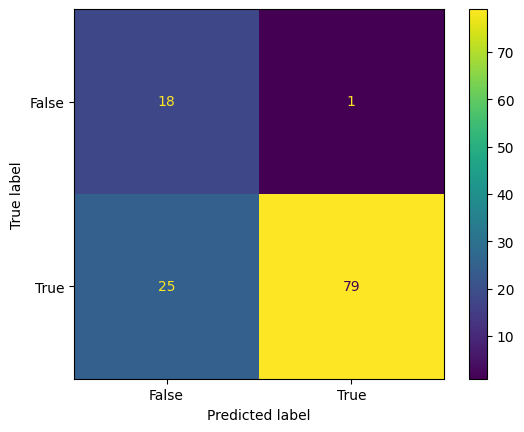

In [104]:
import matplotlib.pyplot as plt

cm_display.plot()
plt.show()